welcome
This dataset contains a list of video games with sales greater than 100,000 copies
this is the step 

In [20]:
#import all library and set plots we want to use
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
%matplotlib inline

In [2]:
df = pd.read_csv('vgsales.csv')

In [6]:
#show first 10 rows
df.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [7]:
#print a concise summary of a Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [8]:
#calculating some statistical data
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [9]:
#show number of rows and colomns
df.shape

(16598, 11)

In [10]:
sorted(list(df.Platform.unique()))

['2600',
 '3DO',
 '3DS',
 'DC',
 'DS',
 'GB',
 'GBA',
 'GC',
 'GEN',
 'GG',
 'N64',
 'NES',
 'NG',
 'PC',
 'PCFX',
 'PS',
 'PS2',
 'PS3',
 'PS4',
 'PSP',
 'PSV',
 'SAT',
 'SCD',
 'SNES',
 'TG16',
 'WS',
 'Wii',
 'WiiU',
 'X360',
 'XB',
 'XOne']

In [23]:
df.drop(['Publisher'],axis=1, inplace=True)
df.head()

,Rank,Name,Platform,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,31.37


In [24]:
#To find duplicates 
sum(df.duplicated())

0

In [25]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [27]:
df[df.isnull().any(axis=1)].sort_values(['Year'], ascending=True)

,Rank,Name,Platform,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
179,180,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,5.23
377,378,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,3.49
431,432,LEGO Batman: The Videogame,Wii,NaN,Action,1.86,1.02,0.00,0.29,3.17
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,3.00
607,608,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,2.53
...,...,...,...,...,...,...,...,...,...,...
16307,16310,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,0.01
16327,16330,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,0.01
16366,16369,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,0.01
16427,16430,Virtua Quest,GC,NaN,Role-Playing,0.01,0.00,0.00,0.00,0.01


In [29]:
df.dropna(inplace=True)
print(df.isnull().sum().any())
print(df.info())

False
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16327 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16327 non-null  int64  
 1   Name          16327 non-null  object 
 2   Platform      16327 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16327 non-null  object 
 5   NA_Sales      16327 non-null  float64
 6   EU_Sales      16327 non-null  float64
 7   JP_Sales      16327 non-null  float64
 8   Other_Sales   16327 non-null  float64
 9   Global_Sales  16327 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 1.4+ MB
None


In [34]:
df[['NA_Sales','EU_Sales', 'JP_Sales', 'Global_Sales']].sort_values('Global_Sales', ascending=False).head()

,NA_Sales,EU_Sales,JP_Sales,Global_Sales
0,41.49,29.02,3.77,82.74
1,29.08,3.58,6.81,40.24
2,15.85,12.88,3.79,35.82
3,15.75,11.01,3.28,33.00
4,11.27,8.89,10.22,31.37


In [35]:
df[['NA_Sales','EU_Sales', 'JP_Sales', 'Global_Sales']].sort_values('Global_Sales', ascending=False).tail()

,NA_Sales,EU_Sales,JP_Sales,Global_Sales
16184,0.00,0.00,0.01,0.01
16185,0.00,0.00,0.01,0.01
16186,0.00,0.01,0.00,0.01
16187,0.00,0.01,0.00,0.01
16597,0.01,0.00,0.00,0.01


In [36]:
sorted(list(df.Year.unique()))

[1980.0,
 1981.0,
 1982.0,
 1983.0,
 1984.0,
 1985.0,
 1986.0,
 1987.0,
 1988.0,
 1989.0,
 1990.0,
 1991.0,
 1992.0,
 1993.0,
 1994.0,
 1995.0,
 1996.0,
 1997.0,
 1998.0,
 1999.0,
 2000.0,
 2001.0,
 2002.0,
 2003.0,
 2004.0,
 2005.0,
 2006.0,
 2007.0,
 2008.0,
 2009.0,
 2010.0,
 2011.0,
 2012.0,
 2013.0,
 2014.0,
 2015.0,
 2016.0,
 2017.0,
 2020.0]

In [43]:
bin_edges = [1980, 1990, 2000, 2010, 2020]
bin_names = ['eighties', 'nineties', 'two_thousands', 'two_thousand_tens']
df['decades'] = pd.cut(df['Year'], bin_edges, labels=bin_names)
df.head()

,Rank,Name,Platform,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,decades
0,1,Wii Sports,Wii,2006.0,Sports,41.49,29.02,3.77,8.46,82.74,two_thousands
1,2,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,40.24,eighties
2,3,Mario Kart Wii,Wii,2008.0,Racing,15.85,12.88,3.79,3.31,35.82,two_thousands
3,4,Wii Sports Resort,Wii,2009.0,Sports,15.75,11.01,3.28,2.96,33.00,two_thousands
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,31.37,nineties


In [44]:
df[['Year', 'decades']].head()

,Year,decades
0,2006.0,two_thousands
1,1985.0,eighties
2,2008.0,two_thousands
3,2009.0,two_thousands
4,1996.0,nineties


The Answers

Which platforms are the most popular?

In [50]:
df['Platform'].value_counts()

DS      2133
PS2     2127
PS3     1304
Wii     1290
X360    1235
PSP     1197
PS      1189
PC       943
GBA      811
XB       803
GC       542
3DS      500
PSV      412
PS4      336
N64      316
SNES     239
XOne     213
SAT      173
WiiU     143
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

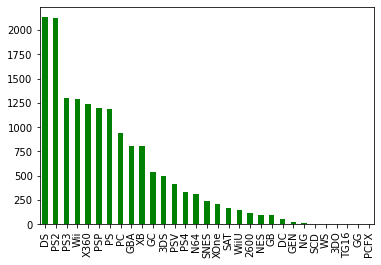

In [65]:
df['Platform'].value_counts().plot(kind='bar', color='g'
);

How many -Super Mario All-Stars- game sales in Japan?


In [45]:
df.Name.value_counts()

Need for Speed: Most Wanted                12
Ratatouille                                 9
LEGO Marvel Super Heroes                    9
FIFA 14                                     9
Lego Batman 3: Beyond Gotham                8
                                           ..
Nancy Drew: The Hidden Staircase            1
Virtual Villagers: A New Home               1
Star Wars: Starfighter                      1
Power Rangers: S.P.D.                       1
Naruto: Uzumaki Chronicles 2 (JP sales)     1
Name: Name, Length: 11360, dtype: int64

How many releases in 2012?

In [55]:
df['Year'].value_counts()

2009.0    1431
2008.0    1428
2010.0    1259
2007.0    1202
2011.0    1139
2006.0    1008
2005.0     941
2002.0     829
2003.0     775
2004.0     763
2012.0     657
2015.0     614
2014.0     582
2013.0     546
2001.0     482
1998.0     379
2000.0     349
2016.0     344
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1983.0      17
1989.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
2017.0       3
2020.0       1
Name: Year, dtype: int64

What is the most frequent genre of games?



In [64]:
df.Genre.value_counts()

Action          3253
Sports          2304
Misc            1710
Role-Playing    1471
Shooter         1282
Adventure       1276
Racing          1226
Platform         876
Simulation       851
Fighting         836
Strategy         671
Puzzle           571
Name: Genre, dtype: int64